In [4]:
import numpy as np
import cv2
from matplotlib import pyplot as plt
from PIL import Image
import csv

In [5]:
def ResizeImages(imagesPath, width=50, height=50):
    # resizes all images from the micro-PCB dataset in the folder with path 'imagesPath'
    # width and height are parameters and are standard 50 by 50
    
    alpha = ['A','B','C','D','E']
    alpha2 = ['A','B','C','D','E','F','G','H','I','J','K','L','M']
    
    print( 'Resized Dimensions : ' + str(width) + 'x' + str(height) ) 

    for a in range(len(alpha2)):
        for b in range(len(alpha)):
            for c in range(len(alpha)):
                for d in range(len(alpha)):        
                    for i in range(4):
                        img = cv2.imread(imagesPath + alpha2[a] + alpha[b] + alpha[c]+ alpha[d] + str(i+1) +'.jpg', 1)
                        #cv2.imshow('Original', img)
                        #print('Original Dimensions : ', img.shape)

                        resized_img = cv2.resize(img, (width,height), interpolation = cv2.INTER_AREA)

                       # cv2.imshow("Resized image", resized)
                       # cv2.waitKey(0)
                       # cv2.destroyAllWindows()

                        filename = alpha2[a] + alpha[b] + alpha[c]+ alpha[d] + str(i+1) +'.jpg'
                        print('filename: ', filename)


                        cv2.imwrite(filename, resized_img)
                    

In [13]:
def displayChannelsFromArray(arr):
    # displays seperate images for Red, Green and Blue channel of an image
    # the image has to be passed as a array of size 'height x width x 3'
    
    #print(arr[:,:,0])
    fig = plt.figure(figsize=(10, 7))
    rows = 1
    columns = 4

    fig.add_subplot(rows, columns, 1)
    plt.imshow(arr)

    fig.add_subplot(rows, columns, 2)
    plt.imshow(arr[:,:,0], cmap='gray')

    fig.add_subplot(rows, columns, 3)
    plt.imshow(arr[:,:,1], cmap='gray')

    fig.add_subplot(rows, columns, 4)
    plt.imshow(arr[:,:,2], cmap='gray')

In [14]:
def DisplayChannelsFromCSV(path, imageName, width=50, height=50):
    # displays seperate Red, Green and Blue channels for an image from the CSV file of the dataset
    
    with open(path, newline='') as csvfile:
        reader = csv.reader(csvfile, delimiter=',')
        for row in reader:
            if row[0] == imageName:
                imageVec = row[1:]
                imageArr = np.reshape(imageVec, (width,height,3)).astype(int)
                displayChannelsFromArray(imageArr)
                break

In [8]:
def ImagesToCSV(csvPath, imagesPath):
    # writes pixel values for each color of each image to csv file
    # first column is the name of the image file followed by the unrolled vector of the 'width x height x 3' array
    # csvPath is the output path to the csvfile to be written
    # imagesPath is the path to the folder containing the images of the micro-PCBs
    
    alpha2 = ['A','B','C','D','E','F','G','H','I','J','K','L','M']
    alpha = ['A','B','C','D','E']
    
    with open(csvPath, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile, delimiter=',')
        
        for a in range(len(alpha2)):
            for b in range(len(alpha)):
                for c in range(len(alpha)):
                    for d in range(len(alpha)):        
                        for i in range(4):
                            filename = imagesPath + alpha2[a] + alpha[b] + alpha[c]+ alpha[d] + str(i+1) +'.jpg'
                            rescaled_img = Image.open(filename)
                            X = np.array(rescaled_img).ravel()
                            y = [alpha2[a] + alpha[b] + alpha[c]+ alpha[d] + str(i+1)]
                            row = np.concatenate([y,X])
                            
                            writer.writerow(row)

## data preparation pipeline
Run the following block with the correct paths for your computer in order to:
- resize the images, width and height are settable
- write the raw image data to a csv file

In [11]:
#ResizeImages('../train_coded/train_coded/')
#ImagesToCSV('../train_coded50x50/channeldata.csv', '../train_coded50x50/')

### Verify data
To verify the above data was resized and written to the csv file correctly, the next block can be executed.
If you used a different width and height than the standard 50x50 in the data preparation you must pass this to the function `DisplayChannelsFromCSV()` aswell 

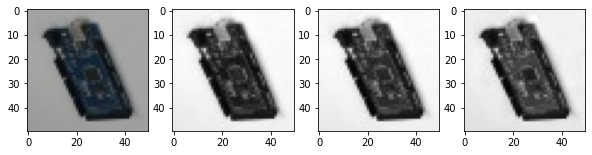

In [15]:
DisplayChannelsFromCSV('../train_coded50x50/channeldata.csv','AAAA1')